# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
df["happy"].value_counts()

happy
8     10182
7      7434
9      5439
10     3930
6      3811
5      3647
4      1227
3       951
2       462
0       245
1       193
88       47
77       32
99       11
Name: count, dtype: int64

AttributeError: Line2D.set() got an unexpected keyword argument 'kind'

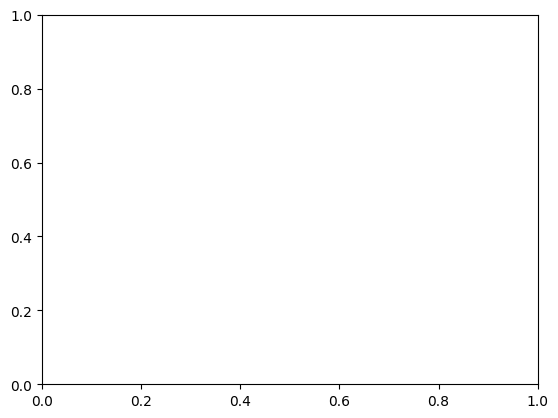

In [8]:
plt.plot(df["happy"].value_counts())

In [5]:
df = pd.read_csv("20240319_ESS10_baseline-model_arthurcornelio88.csv")
df

,Unnamed: 0,cntry,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,happy
0,0,BE,2,5,2,2,2,7,1,1,1,7
1,1,BE,2,4,4,2,2,4,2,1,2,6
2,2,BE,1,4,2,1,2,0,2,2,2,8
3,3,BE,1,5,3,2,1,5,2,2,2,10
4,4,BE,1,6,4,2,1,1,2,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
37606,37606,SK,1,3,1,2,3,8,2,1,1,5
37607,37607,SK,1,7,1,3,2,1,2,1,1,8
37608,37608,SK,1,3,3,3,2,8,2,1,1,7
37609,37609,SK,2,6,1,4,2,3,9,2,1,7


In [3]:
row = np.array(["BE",4,3,2,5,7,6,2,4,6])
#row_exp = np.expand_dims(row,axis=1)
dikt ={"X_pred" : list(row)}
#row_exp
# df.columns[1:-1]
X_pred = pd.DataFrame([row, row], columns=df.columns[1:-1])
X_pred

,cntry,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr
0,BE,4,3,2,5,7,6,2,4,6
1,BE,4,3,2,5,7,6,2,4,6


In [4]:
X_PRED = pd.DataFrame([np.array(["FR",4,3,2,5,7,6,2,4,6])], columns=['cntry', 'gndr', 'sclmeet', 'inprdsc', 'sclact', 'health', 'rlgdgr',
       'dscrgrp', 'ctzcntr', 'brncntr'])
X_PRED


,cntry,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr
0,FR,4,3,2,5,7,6,2,4,6


In [5]:
# remove the first column
df = df.drop(df.columns[0], axis=1)
df

,cntry,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,happy
0,BE,2,5,2,2,2,7,1,1,1,7
1,BE,2,4,4,2,2,4,2,1,2,6
2,BE,1,4,2,1,2,0,2,2,2,8
3,BE,1,5,3,2,1,5,2,2,2,10
4,BE,1,6,4,2,1,1,2,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...
37606,SK,1,3,1,2,3,8,2,1,1,5
37607,SK,1,7,1,3,2,1,2,1,1,8
37608,SK,1,3,3,3,2,8,2,1,1,7
37609,SK,2,6,1,4,2,3,9,2,1,7


In [6]:
df.isnull().sum()

cntry      0
gndr       0
sclmeet    0
inprdsc    0
sclact     0
health     0
rlgdgr     0
dscrgrp    0
ctzcntr    0
brncntr    0
happy      0
dtype: int64

# Seperate features and target

In [7]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [8]:
X

,cntry,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr
0,BE,2,5,2,2,2,7,1,1,1
1,BE,2,4,4,2,2,4,2,1,2
2,BE,1,4,2,1,2,0,2,2,2
3,BE,1,5,3,2,1,5,2,2,2
4,BE,1,6,4,2,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...
37606,SK,1,3,1,2,3,8,2,1,1
37607,SK,1,7,1,3,2,1,2,1,1
37608,SK,1,3,3,3,2,8,2,1,1
37609,SK,2,6,1,4,2,3,9,2,1


In [9]:
X.dtypes

cntry      object
gndr        int64
sclmeet     int64
inprdsc     int64
sclact      int64
health      int64
rlgdgr      int64
dscrgrp     int64
ctzcntr     int64
brncntr     int64
dtype: object

Feature scaling 

###### `sclmeet` category = How often socially meet with friends, relatives or colleagues 1-7 refusal =77, dontknow = 88, no answer = 99
###### `inprdsc` category = How many people with whom you can discuss intimate and personal matters 0-6 refusal =77, dontknow = 88, no answer= 99
###### `sclact` category = Take part in social activities compared to others of same age, 1-5 refusal = 7, dont know =8 , no answer =9
###### `health` category = Subjective general health 1-5 refusal = 7, dont know =8 , no answer =9
###### `rlgdgr` category = How religious are you  0-10 77 88 99

###### `dscrgrp` category = Member of a group discriminated against in this country, , yes, no , refusal(7), 8(dont know), 9(no answer)
###### `ctzcntr` category = Citizen of country, yes, no , refusal(7), 8(dont know), 9(no answer)
###### `brncntr` category = Born in country, yes, no , refusal(7), 8(dont know), 9(no answer)
###### `gndr` category = 1,2 no answer = 9
###### `Country` category

# Feature Scaling

In [10]:
X.columns

Index(['cntry', 'gndr', 'sclmeet', 'inprdsc', 'sclact', 'health', 'rlgdgr',
       'dscrgrp', 'ctzcntr', 'brncntr'],
      dtype='object')

In [11]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
X.shape

(37611, 10)

In [13]:
#One hot encoding of X['cntry']
X = pd.get_dummies(X, columns=['cntry'], drop_first=True)
X

,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,cntry_BG,...,cntry_IS,cntry_IT,cntry_LT,cntry_ME,cntry_MK,cntry_NL,cntry_NO,cntry_PT,cntry_SI,cntry_SK
0,2,5,2,2,2,7,1,1,1,False,...,False,False,False,False,False,False,False,False,False,False
1,2,4,4,2,2,4,2,1,2,False,...,False,False,False,False,False,False,False,False,False,False
2,1,4,2,1,2,0,2,2,2,False,...,False,False,False,False,False,False,False,False,False,False
3,1,5,3,2,1,5,2,2,2,False,...,False,False,False,False,False,False,False,False,False,False
4,1,6,4,2,1,1,2,2,2,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,1,3,1,2,3,8,2,1,1,False,...,False,False,False,False,False,False,False,False,False,True
37607,1,7,1,3,2,1,2,1,1,False,...,False,False,False,False,False,False,False,False,False,True
37608,1,3,3,3,2,8,2,1,1,False,...,False,False,False,False,False,False,False,False,False,True
37609,2,6,1,4,2,3,9,2,1,False,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# For sclmeet, create a new column called sclmeet_refusal, sclmeet_dontknow, sclmeet_noanswer , put true if the value is 77, 88, 99 respectively
X['sclmeet_refusal'] = X['sclmeet'].apply(lambda x: 1 if x == 77 else 0)
X['sclmeet_dontknow'] = X['sclmeet'].apply(lambda x: 1 if x == 88 else 0)
X['sclmeet_noanswer'] = X['sclmeet'].apply(lambda x: 1 if x == 99 else 0)
# Replace values 77, 88, 99 with O
X['sclmeet'] = X['sclmeet'].replace([77, 88, 99], 0)
X

,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,cntry_BG,...,cntry_ME,cntry_MK,cntry_NL,cntry_NO,cntry_PT,cntry_SI,cntry_SK,sclmeet_refusal,sclmeet_dontknow,sclmeet_noanswer
0,2,5,2,2,2,7,1,1,1,False,...,False,False,False,False,False,False,False,0,0,0
1,2,4,4,2,2,4,2,1,2,False,...,False,False,False,False,False,False,False,0,0,0
2,1,4,2,1,2,0,2,2,2,False,...,False,False,False,False,False,False,False,0,0,0
3,1,5,3,2,1,5,2,2,2,False,...,False,False,False,False,False,False,False,0,0,0
4,1,6,4,2,1,1,2,2,2,False,...,False,False,False,False,False,False,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,1,3,1,2,3,8,2,1,1,False,...,False,False,False,False,False,False,True,0,0,0
37607,1,7,1,3,2,1,2,1,1,False,...,False,False,False,False,False,False,True,0,0,0
37608,1,3,3,3,2,8,2,1,1,False,...,False,False,False,False,False,False,True,0,0,0
37609,2,6,1,4,2,3,9,2,1,False,...,False,False,False,False,False,False,True,0,0,0


In [15]:
# Same for inprdsc
X['inprdsc_refusal'] = X['inprdsc'].apply(lambda x: 1 if x == 77 else 0)
X['inprdsc_dontknow'] = X['inprdsc'].apply(lambda x: 1 if x == 88 else 0)
X['inprdsc_noanswer'] = X['inprdsc'].apply(lambda x: 1 if x == 99 else 0)
# Replace values 77, 88, 99 with O
X['inprdsc'] = X['inprdsc'].replace([77, 88, 99], 0)
X

,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,cntry_BG,...,cntry_NO,cntry_PT,cntry_SI,cntry_SK,sclmeet_refusal,sclmeet_dontknow,sclmeet_noanswer,inprdsc_refusal,inprdsc_dontknow,inprdsc_noanswer
0,2,5,2,2,2,7,1,1,1,False,...,False,False,False,False,0,0,0,0,0,0
1,2,4,4,2,2,4,2,1,2,False,...,False,False,False,False,0,0,0,0,0,0
2,1,4,2,1,2,0,2,2,2,False,...,False,False,False,False,0,0,0,0,0,0
3,1,5,3,2,1,5,2,2,2,False,...,False,False,False,False,0,0,0,0,0,0
4,1,6,4,2,1,1,2,2,2,False,...,False,False,False,False,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,1,3,1,2,3,8,2,1,1,False,...,False,False,False,True,0,0,0,0,0,0
37607,1,7,1,3,2,1,2,1,1,False,...,False,False,False,True,0,0,0,0,0,0
37608,1,3,3,3,2,8,2,1,1,False,...,False,False,False,True,0,0,0,0,0,0
37609,2,6,1,4,2,3,9,2,1,False,...,False,False,False,True,0,0,0,0,0,0


In [16]:
# Same for sclact
X['sclact_refusal'] = X['sclact'].apply(lambda x: 1 if x == 77 else 0)
X['sclact_dontknow'] = X['sclact'].apply(lambda x: 1 if x == 88 else 0)
X['sclact_noanswer'] = X['sclact'].apply(lambda x: 1 if x == 99 else 0)
# Replace values 77, 88, 99 with O
X['sclact'] = X['sclact'].replace([77, 88, 99], 0)
X


,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,cntry_BG,...,cntry_SK,sclmeet_refusal,sclmeet_dontknow,sclmeet_noanswer,inprdsc_refusal,inprdsc_dontknow,inprdsc_noanswer,sclact_refusal,sclact_dontknow,sclact_noanswer
0,2,5,2,2,2,7,1,1,1,False,...,False,0,0,0,0,0,0,0,0,0
1,2,4,4,2,2,4,2,1,2,False,...,False,0,0,0,0,0,0,0,0,0
2,1,4,2,1,2,0,2,2,2,False,...,False,0,0,0,0,0,0,0,0,0
3,1,5,3,2,1,5,2,2,2,False,...,False,0,0,0,0,0,0,0,0,0
4,1,6,4,2,1,1,2,2,2,False,...,False,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,1,3,1,2,3,8,2,1,1,False,...,True,0,0,0,0,0,0,0,0,0
37607,1,7,1,3,2,1,2,1,1,False,...,True,0,0,0,0,0,0,0,0,0
37608,1,3,3,3,2,8,2,1,1,False,...,True,0,0,0,0,0,0,0,0,0
37609,2,6,1,4,2,3,9,2,1,False,...,True,0,0,0,0,0,0,0,0,0


In [17]:
# Same for health
X['health_refusal'] = X['health'].apply(lambda x: 1 if x == 77 else 0)
X['health_dontknow'] = X['health'].apply(lambda x: 1 if x == 88 else 0)
X['health_noanswer'] = X['health'].apply(lambda x: 1 if x == 99 else 0)
# Replace values 77, 88, 99 with O
X['health'] = X['health'].replace([77, 88, 99], 0)
X

,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,cntry_BG,...,sclmeet_noanswer,inprdsc_refusal,inprdsc_dontknow,inprdsc_noanswer,sclact_refusal,sclact_dontknow,sclact_noanswer,health_refusal,health_dontknow,health_noanswer
0,2,5,2,2,2,7,1,1,1,False,...,0,0,0,0,0,0,0,0,0,0
1,2,4,4,2,2,4,2,1,2,False,...,0,0,0,0,0,0,0,0,0,0
2,1,4,2,1,2,0,2,2,2,False,...,0,0,0,0,0,0,0,0,0,0
3,1,5,3,2,1,5,2,2,2,False,...,0,0,0,0,0,0,0,0,0,0
4,1,6,4,2,1,1,2,2,2,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,1,3,1,2,3,8,2,1,1,False,...,0,0,0,0,0,0,0,0,0,0
37607,1,7,1,3,2,1,2,1,1,False,...,0,0,0,0,0,0,0,0,0,0
37608,1,3,3,3,2,8,2,1,1,False,...,0,0,0,0,0,0,0,0,0,0
37609,2,6,1,4,2,3,9,2,1,False,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Same for rlgdgr
X['rlgdgr_refusal'] = X['rlgdgr'].apply(lambda x: 1 if x == 77 else 0)
X['rlgdgr_dontknow'] = X['rlgdgr'].apply(lambda x: 1 if x == 88 else 0)
X['rlgdgr_noanswer'] = X['rlgdgr'].apply(lambda x: 1 if x == 99 else 0)
# Replace values 77, 88, 99 with O
X['rlgdgr'] = X['rlgdgr'].replace([77, 88, 99], 0)
X


,gndr,sclmeet,inprdsc,sclact,health,rlgdgr,dscrgrp,ctzcntr,brncntr,cntry_BG,...,inprdsc_noanswer,sclact_refusal,sclact_dontknow,sclact_noanswer,health_refusal,health_dontknow,health_noanswer,rlgdgr_refusal,rlgdgr_dontknow,rlgdgr_noanswer
0,2,5,2,2,2,7,1,1,1,False,...,0,0,0,0,0,0,0,0,0,0
1,2,4,4,2,2,4,2,1,2,False,...,0,0,0,0,0,0,0,0,0,0
2,1,4,2,1,2,0,2,2,2,False,...,0,0,0,0,0,0,0,0,0,0
3,1,5,3,2,1,5,2,2,2,False,...,0,0,0,0,0,0,0,0,0,0
4,1,6,4,2,1,1,2,2,2,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,1,3,1,2,3,8,2,1,1,False,...,0,0,0,0,0,0,0,0,0,0
37607,1,7,1,3,2,1,2,1,1,False,...,0,0,0,0,0,0,0,0,0,0
37608,1,3,3,3,2,8,2,1,1,False,...,0,0,0,0,0,0,0,0,0,0
37609,2,6,1,4,2,3,9,2,1,False,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# One hot encoding of ctzcntr, brncntr, gndr, dscrgrp
X = pd.get_dummies(X, columns=['ctzcntr'], drop_first=True)
X = pd.get_dummies(X, columns=['brncntr'], drop_first=True)
X = pd.get_dummies(X, columns=['gndr'], drop_first=True)
X = pd.get_dummies(X, columns=['dscrgrp'], drop_first=True)
X

,sclmeet,inprdsc,sclact,health,rlgdgr,cntry_BG,cntry_CH,cntry_CZ,cntry_EE,cntry_FI,...,ctzcntr_9,brncntr_2,brncntr_7,brncntr_8,brncntr_9,gndr_2,dscrgrp_2,dscrgrp_7,dscrgrp_8,dscrgrp_9
0,5,2,2,2,7,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,4,4,2,2,4,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
2,4,2,1,2,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,5,3,2,1,5,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,6,4,2,1,1,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,3,1,2,3,8,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
37607,7,1,3,2,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
37608,3,3,3,2,8,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
37609,6,1,4,2,3,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [20]:
#Replace all True with 1 and False with 0
X = X.replace([True, False], [1, 0])
X

/tmp/ipykernel_391239/4283820841.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace([True, False], [1, 0])


,sclmeet,inprdsc,sclact,health,rlgdgr,cntry_BG,cntry_CH,cntry_CZ,cntry_EE,cntry_FI,...,ctzcntr_9,brncntr_2,brncntr_7,brncntr_8,brncntr_9,gndr_2,dscrgrp_2,dscrgrp_7,dscrgrp_8,dscrgrp_9
0,5,2,2,2,7,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,4,2,2,4,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,4,2,1,2,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,5,3,2,1,5,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,6,4,2,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37606,3,1,2,3,8,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
37607,7,1,3,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
37608,3,3,3,2,8,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
37609,6,1,4,2,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [21]:
X.isnull().sum()

sclmeet             0
inprdsc             0
sclact              0
health              0
rlgdgr              0
cntry_BG            0
cntry_CH            0
cntry_CZ            0
cntry_EE            0
cntry_FI            0
cntry_FR            0
cntry_GB            0
cntry_GR            0
cntry_HR            0
cntry_HU            0
cntry_IE            0
cntry_IS            0
cntry_IT            0
cntry_LT            0
cntry_ME            0
cntry_MK            0
cntry_NL            0
cntry_NO            0
cntry_PT            0
cntry_SI            0
cntry_SK            0
sclmeet_refusal     0
sclmeet_dontknow    0
sclmeet_noanswer    0
inprdsc_refusal     0
inprdsc_dontknow    0
inprdsc_noanswer    0
sclact_refusal      0
sclact_dontknow     0
sclact_noanswer     0
health_refusal      0
health_dontknow     0
health_noanswer     0
rlgdgr_refusal      0
rlgdgr_dontknow     0
rlgdgr_noanswer     0
ctzcntr_2           0
ctzcntr_7           0
ctzcntr_8           0
ctzcntr_9           0
brncntr_2 

# Modeling

In [22]:
# # Linear regression model to predict the value of y
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mean_squared_error(y_test, y_pred)

In [23]:
# # Other metrics
# from sklearn.metrics import r2_score
# print(r2_score(y_test, y_pred))

# from sklearn.metrics import mean_absolute_error
# print(mean_absolute_error(y_test, y_pred))

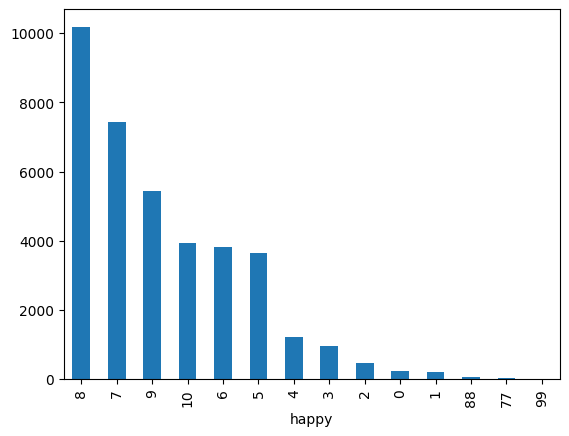

In [24]:
# plot bar y and value counts
y.value_counts().plot(kind='bar')
plt.show()

In [25]:
# import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Rounding the predictions to the nearest integer and constraining them to the range [0, 10]
y_pred_constrained = np.clip(np.round(y_pred), 0, 10)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred_constrained)
print("Mean Squared Error:", mse)

Mean Squared Error: 16.27927688422172


In [30]:
y_pred_constrained

array([8., 7., 8., ..., 8., 7., 7.])

In [28]:
#R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))


0.04679604039890073


The R-squared value of 0.0467 indicates that approximately 4.67% of the variability in the dependent variable can be explained by the independent variable(s).

In [ ]:
bb

Feature: 0, Score: 0.11060
Feature: 1, Score: 0.09204
Feature: 2, Score: 0.12496
Feature: 3, Score: -0.47203
Feature: 4, Score: 0.04806
Feature: 5, Score: -1.38787
Feature: 6, Score: 0.09046
Feature: 7, Score: -0.47065
Feature: 8, Score: 0.16378
Feature: 9, Score: 0.60633
Feature: 10, Score: -0.24707
Feature: 11, Score: -0.23211
Feature: 12, Score: -1.14950
Feature: 13, Score: -0.16746
Feature: 14, Score: -0.49025
Feature: 15, Score: -0.00977
Feature: 16, Score: 0.62384
Feature: 17, Score: -0.50390
Feature: 18, Score: -0.19441
Feature: 19, Score: -0.10755
Feature: 20, Score: -0.95939
Feature: 21, Score: 0.13140
Feature: 22, Score: -0.07840
Feature: 23, Score: -0.54289
Feature: 24, Score: 0.12304
Feature: 25, Score: -1.18869
Feature: 26, Score: 16.20592
Feature: 27, Score: 3.83256
Feature: 28, Score: 9.63761
Feature: 29, Score: 5.37047
Feature: 30, Score: 0.80844
Feature: 31, Score: 9.84823
Feature: 32, Score: -0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: -0.00000
Feature: 35

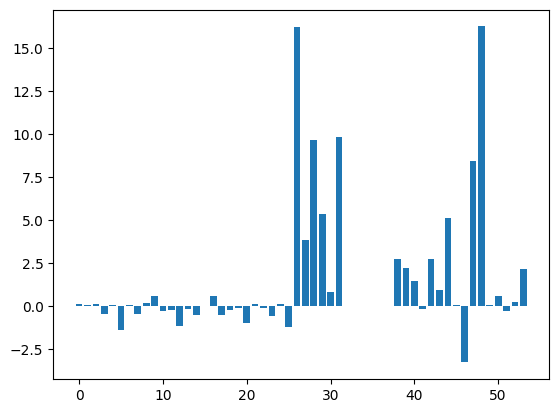

In [29]:
# Important features
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
